In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
X = []
Y = []
X = [((x*10)/100) for x in range(100)]
Y = [(y * 5) for y in X]

print(X)
print(Y)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]
[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 32.5, 33.0, 33.5, 34.0, 34.5, 35.0, 35.5, 36.0, 36.5, 37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43

In [0]:
x = np.array(X,dtype=float)
y = np.array(Y,dtype=float)

x = np.array(x).reshape(100, 1, 1)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)


In [7]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
history = model.fit(x_train,y_train,epochs=2000,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 80 samples, validate on 20 samples
Epoch 1/2000





80/80 [==============================] - 2s 22ms/step - loss: 874.2234 - val_loss: 610.9879
Epoch 2/2000
80/80 [==============================] - 0s 222us/step - loss: 872.6268 - val_loss: 609.9562
Epoch 3/2000
80/80 [==============================] - 0s 206us/step - loss: 871.2326 - val_loss: 608.9764
Epoch 4/2000
80/80 [==============================] - 0s 213us/step - loss: 869.8892 - val_loss: 607.9666
Epoch 5/2000
80/80 [==============================] - 0s 225us/step - loss: 868.4423 - val_loss: 606.9171
Epoch 6/2000
80/80 [==============================] - 0s 204us/step - loss: 866.9388 - val_loss: 605.8525
Epoch 7/2000
80/80 [==============================] - 0s 203us/step - loss: 865.4244 - val_loss: 604.6712
Epoch 8/2000
80/80 [==============================] - 0s 202us/step - loss: 863.6723 - val_loss: 603.3163
Epoch 9

In [0]:
results = model.predict(x_test)

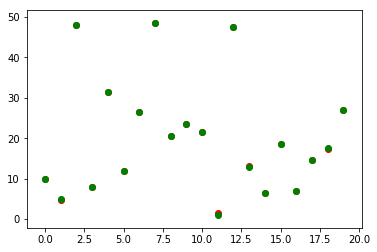

In [10]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()